In [1]:
%matplotlib inline

Adapted from
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [2]:
import numpy as np
from sklearn import datasets

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


In [3]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0], quantile=.3, n_neighbors=10, fname=None):
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    plt.figure(figsize=(10, 10))

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    if fname:
        plt.savefig(fname)


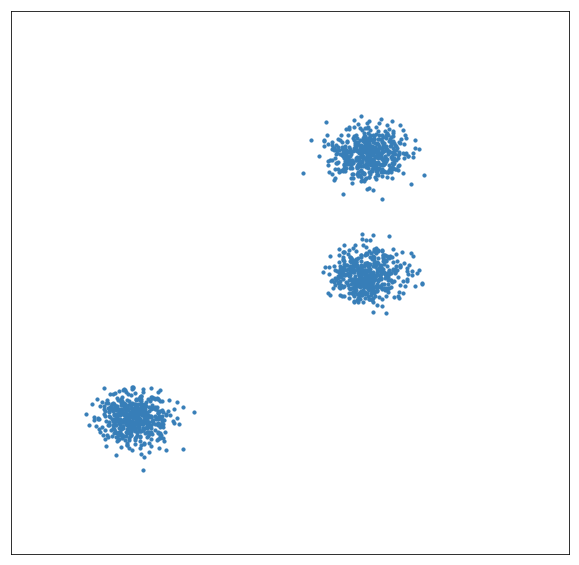

In [4]:
X, y = blobs
# plot_dataset(X, fname='blobs.png')
plot_dataset(X)

## K Means

In [5]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
y_pred = clf.predict(X)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

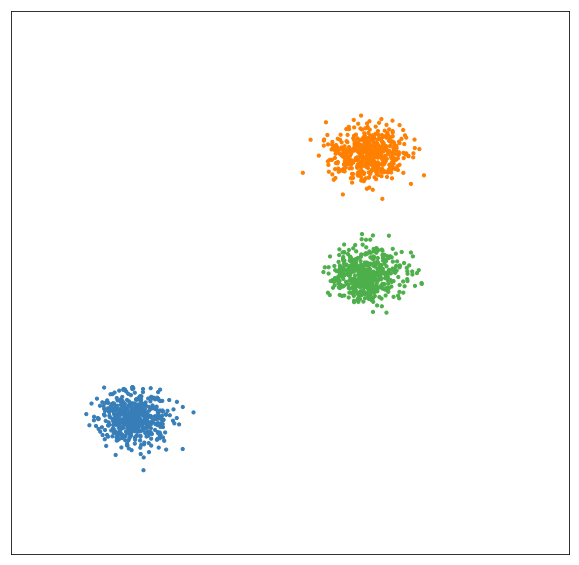

In [7]:
# plot_dataset(X, y_pred, fname='blobs_kmeans_3')
plot_dataset(X, y_pred)

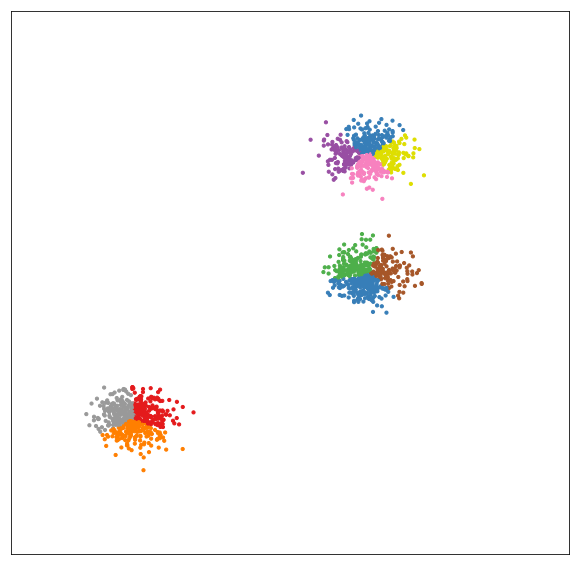

In [8]:
# from sklearn.cluster import MiniBatchKMeans
# clf = MiniBatchKMeans(n_clusters=10)

clf = KMeans(n_clusters=10)
clf.fit(X)
y_pred = clf.predict(X)
# plot_dataset(X, y_pred, fname='blobs_kmeans_10')
plot_dataset(X, y_pred)

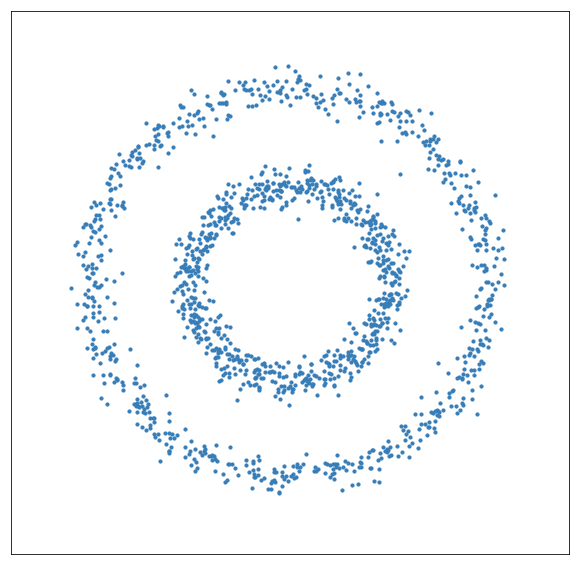

In [9]:
X, y = noisy_circles
# plot_dataset(X, fname='noisy_circles.png')
plot_dataset(X)

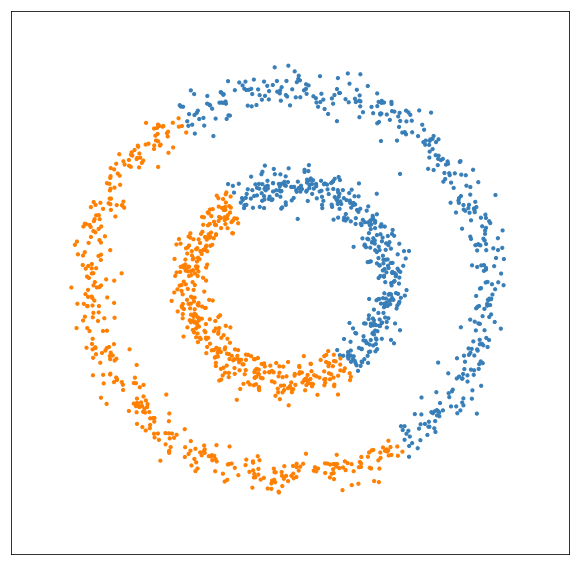

In [10]:
clf = KMeans(n_clusters=2)
clf.fit(X)
y_pred = clf.predict(X)
# plot_dataset(X, y_pred, fname='noisy_circles_kmeans.png')
plot_dataset(X, y_pred)

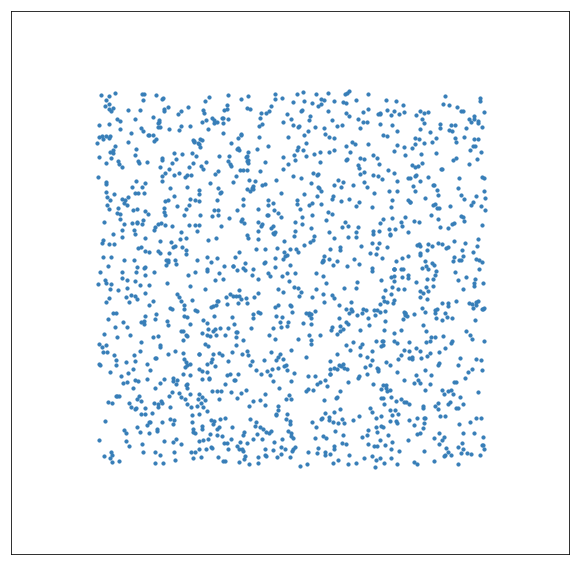

In [11]:
X, y = no_structure
# plot_dataset(X, fname='no_structure.png')
plot_dataset(X)

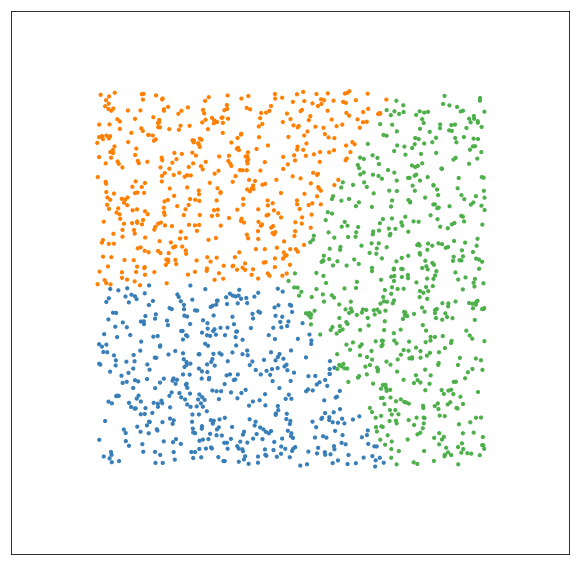

In [12]:
clf = KMeans(n_clusters=3)
clf.fit(X)
y_pred = clf.predict(X)
# plot_dataset(X, y_pred, fname='no_structure_kmeans.png')
plot_dataset(X, y_pred)

## DBSCAN 

In [13]:
# DBSCAN?

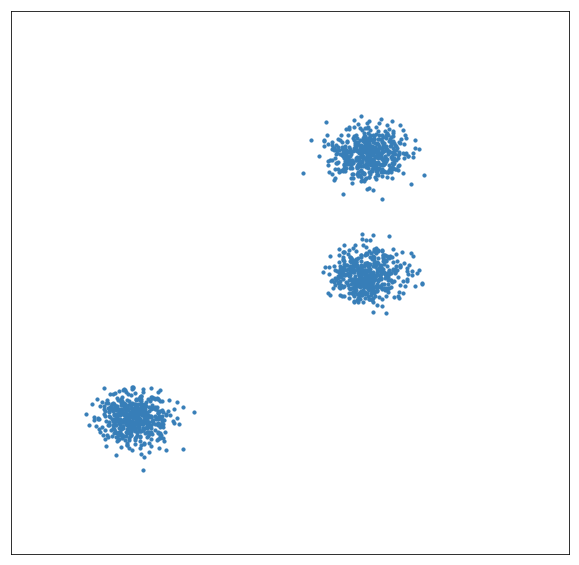

In [14]:
X, y = blobs
plot_dataset(X)

In [15]:
from sklearn.cluster import DBSCAN

clf = DBSCAN()
clf.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

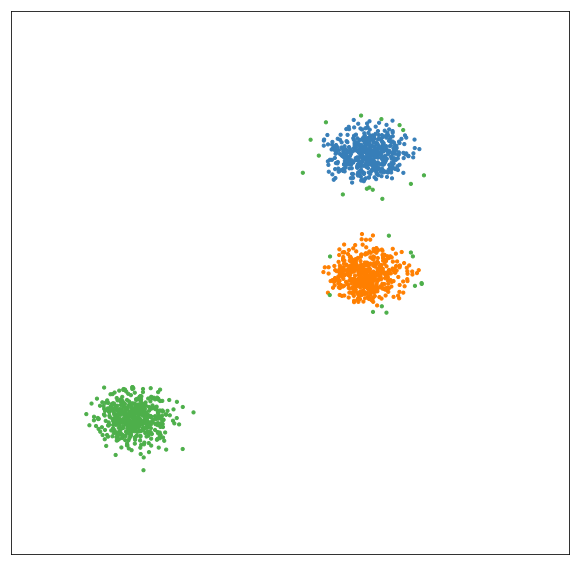

In [16]:
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='blobs_dbscan')
plot_dataset(X, y_pred)

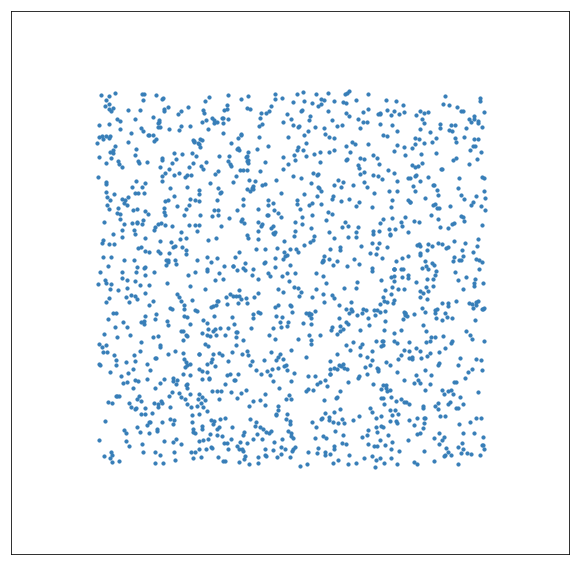

In [17]:
X, y = no_structure
plot_dataset(X)

In [18]:
clf.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

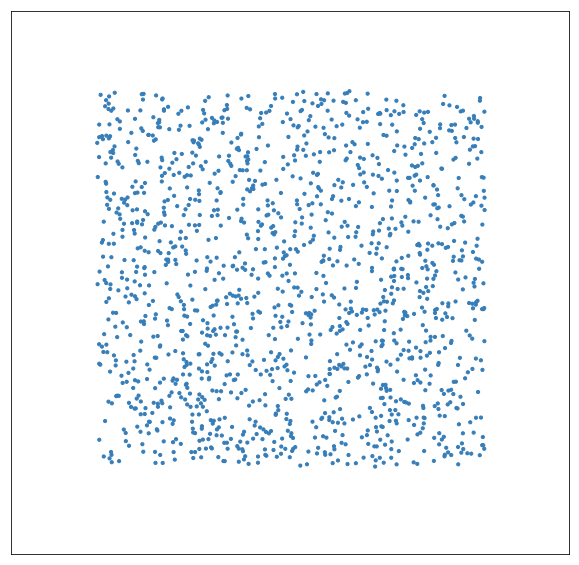

In [19]:
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='no_structure_dbscan')
plot_dataset(X, y_pred)

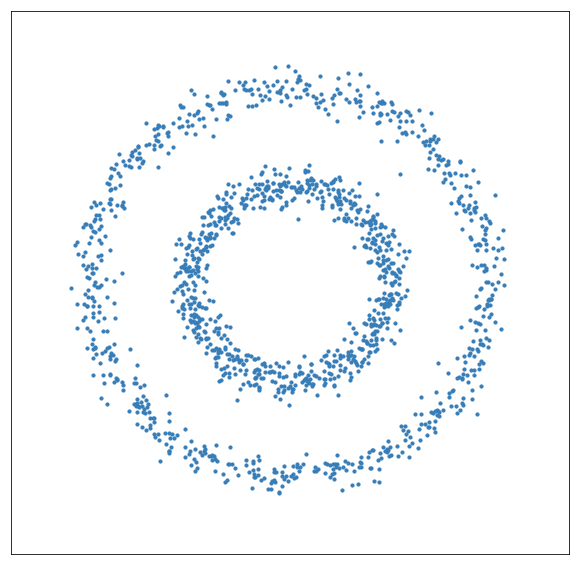

In [20]:
X, y = noisy_circles
plot_dataset(X)

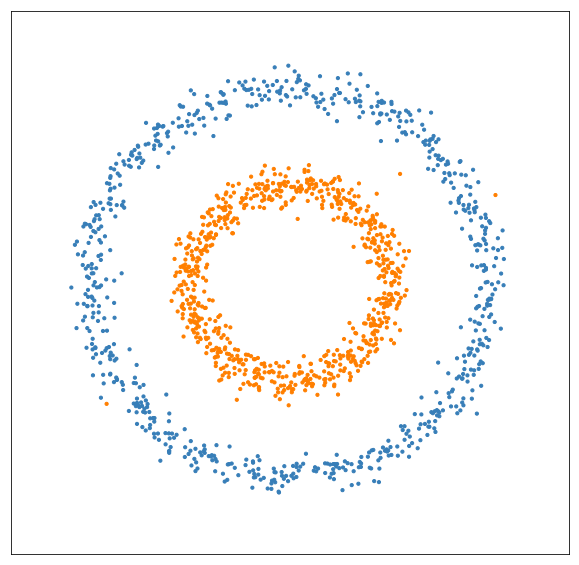

In [21]:
clf = DBSCAN(eps=0.1)
clf.fit(X)
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='noisy_circles_dbscan')
plot_dataset(X, y_pred)

## Metrics

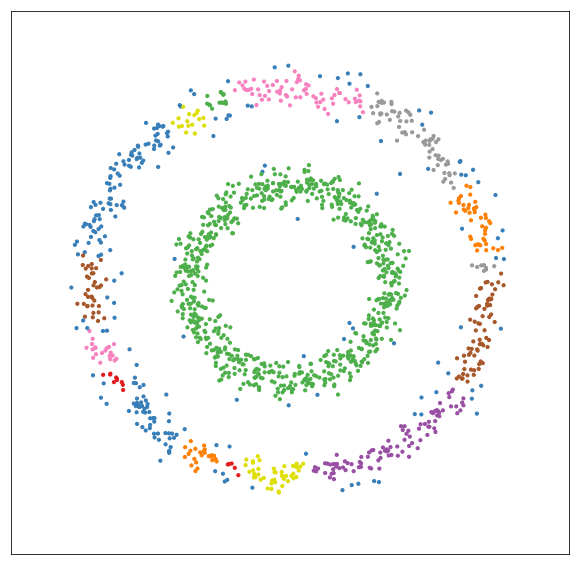

In [22]:
clf = DBSCAN(eps=0.05)
clf.fit(X)
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='noisy_circles_dbscan')
plot_dataset(X, y_pred)

In [23]:
labels = clf.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

19

In [24]:
labels

array([ 0,  1,  2, ...,  2,  8, -1], dtype=int64)

In [25]:
contains_noise = -1 in labels
contains_noise

True

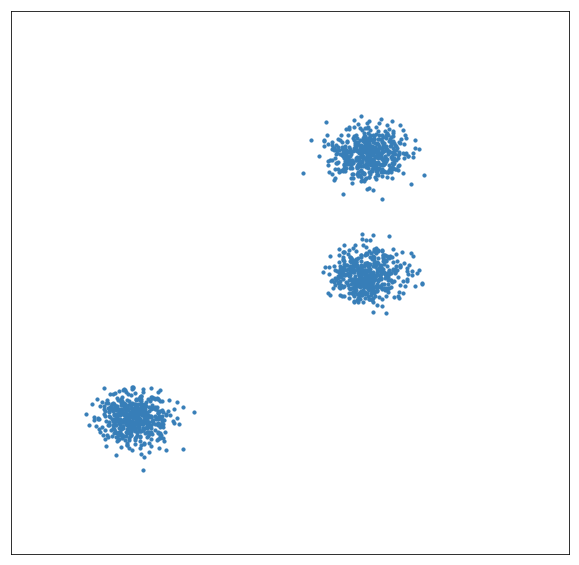

In [26]:
X, y = blobs
plot_dataset(X)

In [27]:
# eps is the maximum distance per two points to still be in the same neighborhood
# min_samples minimum amout of samples to form a cluster
clf = DBSCAN(eps=1.5)
# clf = DBSCAN()
clf.fit(X)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

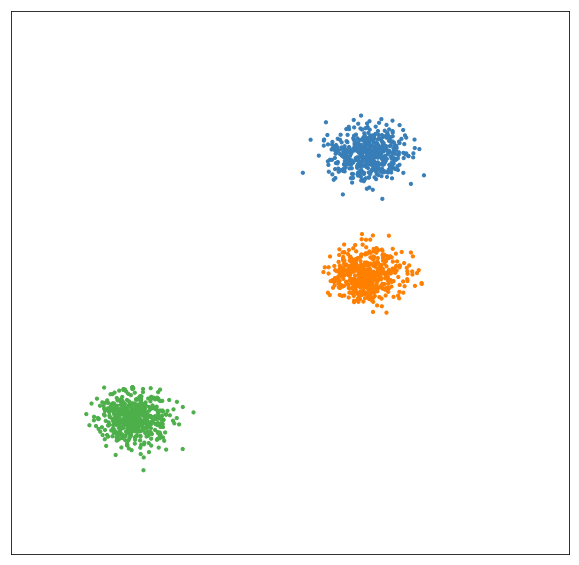

In [28]:
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='blobs_dbscan')
plot_dataset(X, y_pred)

In [29]:
# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_clusters

3

In [30]:
contains_noise = -1 in labels
contains_noise

True

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)

0.8290743874701529

In [32]:
# 1 is great, -1 is worst, around 0 overlapping clusters
# silhouette_score?

In [33]:
from sklearn.metrics import calinski_harabaz_score
calinski_harabaz_score(X, y_pred)

37203.36303934007

In [34]:
# calinski_harabaz_score?